# Band Structure of NiO

##### Germain Salvato Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

Short examples to show how to extract or plot the band structure from a [VASP](http://vasp.at/) calculation using [pymagen](http://pymatgen.org).

First, load used packages :

In [1]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

import matplotlib.pyplot as plt
%matplotlib inline

I work in a directory that contains the calculations of the NiO band structure. Look at [this example](http://cms.mpi.univie.ac.at/wiki/index.php/Fcc_Si_bandstructure) to learn how to obtain a band structure from VASP calculations.

In [2]:
ls

BandStructureNiO.ipynb  KPOINTS                 WAVECAR
CHG                     OSZICAR                 XDATCAR
CHGCAR                  OUTCAR                  jNiO
CONTCAR                 PCDAT                   slurm-348507.out
DOSCAR                  POSCAR                  vasprun.xml
EIGENVAL                POTCAR
INCAR                   PROCAR


### 1) Read vasprun.xml and extract the band structure

In [3]:
run = BSVasprun("vasprun.xml", parse_projected_eigen=True)

In [4]:
bs = run.get_band_structure("KPOINTS")

You can obtain some information about the band structure :

In [5]:
print("number of bands", bs.nb_bands)

number of bands 14


In [6]:
print("number of kpoints", len(bs.kpoints))

number of kpoints 200


In [7]:
bs.is_metal()

False

In [8]:
bs.is_spin_polarized

True

### 2) Extract a given band or eigenvalues

The `bands` attribute of the `BaandStructure` object is a dictionnary of arrays that contains all the bands. The shape is the following :

    {Spin.up: np.array((nb_bands, nb_kpoints)), Spin.down: np.array((nb_bands, nb_kpoints))}

In [9]:
bs.bands

{<Spin.up: 1>: array([[-12.6235, -12.6259, -12.6329, ..., -14.3847, -14.3914, -14.3936],
        [ -3.5768,  -3.5725,  -3.5597, ...,  -1.3942,  -1.3809,  -1.3765],
        [ -2.9295,  -2.9282,  -2.9243, ...,  -1.3815,  -1.3777,  -1.3765],
        ..., 
        [ 20.4623,  20.4656,  20.4757, ...,  23.0714,  23.0629,  23.0559],
        [ 20.4623,  20.4656,  20.4757, ...,  28.6536,  28.9814,  29.1847],
        [ 26.6233,  26.6231,  26.6232, ...,  29.26  ,  29.2519,  29.3045]]),
 <Spin.down: -1>: array([[-12.2547, -12.2571, -12.2642, ..., -14.0377, -14.0444, -14.0466],
        [ -3.0758,  -3.0713,  -3.0576, ...,   0.7154,   0.723 ,   0.7256],
        [  0.5472,   0.5477,   0.5494, ...,   0.7227,   0.7249,   0.7256],
        ..., 
        [ 20.845 ,  20.8494,  20.8627, ...,  23.4954,  23.5054,  23.5058],
        [ 20.845 ,  20.8494,  20.8627, ...,  29.7286,  29.9021,  29.9973],
        [ 27.0945,  27.0942,  27.094 , ...,  29.9072,  29.9491,  29.9978]])}

In [10]:
bs.bands[Spin.up].shape

(14, 200)

The 9th bands of spin down is extracted by :

In [11]:
bs.bands[Spin.down][9, :]

array([ 12.1302,  12.131 ,  12.1334,  12.137 ,  12.1416,  12.1469,
        12.1521,  12.1568,  12.1601,  12.1613,  12.1594,  12.1535,
        12.1428,  12.1264,  12.1034,  12.073 ,  12.0347,  11.988 ,
        11.9326,  11.8683,  11.7951,  11.7132,  11.6228,  11.5244,
        11.4186,  11.3058,  11.1867,  11.062 ,  10.9324,  10.7987,
        10.6617,  10.522 ,  10.3805,  10.238 ,  10.0954,   9.9536,
         9.8135,   9.6761,   9.5424,   9.4137,   9.2911,   9.176 ,
         9.0696,   8.9734,   8.8888,   8.8172,   8.76  ,   8.7182,
         8.6928,   8.6842,   8.6842,   8.6957,   8.7301,   8.7877,
         8.8689,   8.9736,   9.1009,   9.2495,   9.4174,   9.602 ,
         9.8008,  10.011 ,  10.2301,  10.4558,  10.6859,  10.9185,
        11.1519,  11.3844,  11.6146,  11.8408,  12.0616,  12.2756,
        12.4812,  12.677 ,  12.8614,  13.0327,  13.1893,  13.3294,
        13.4513,  13.5535,  13.6345,  13.6936,  13.7303,  13.7454,
        13.7402,  13.7171,  13.6793,  13.6301,  13.5731,  13.5

In order to print a band and the corresponding k-points :

In [12]:
n = 0
for kpoints, e in zip(bs.kpoints, bs.bands[Spin.down][9, :]):
    n += 1
    if n == 11:
        print("...")
    if 10 < n < 190:
        continue

    print("kx = %5.3f  ky = %5.3f  kz = %5.3f   eps(k) = %8.4f" % (tuple(kpoints.frac_coords) +  (e,)))


kx = 0.500  ky = 0.500  kz = 0.500   eps(k) =  12.1302
kx = 0.490  ky = 0.490  kz = 0.490   eps(k) =  12.1310
kx = 0.480  ky = 0.480  kz = 0.480   eps(k) =  12.1334
kx = 0.469  ky = 0.469  kz = 0.469   eps(k) =  12.1370
kx = 0.459  ky = 0.459  kz = 0.459   eps(k) =  12.1416
kx = 0.449  ky = 0.449  kz = 0.449   eps(k) =  12.1469
kx = 0.439  ky = 0.439  kz = 0.439   eps(k) =  12.1521
kx = 0.429  ky = 0.429  kz = 0.429   eps(k) =  12.1568
kx = 0.418  ky = 0.418  kz = 0.418   eps(k) =  12.1601
kx = 0.408  ky = 0.408  kz = 0.408   eps(k) =  12.1613
...
kx = 0.077  ky = 0.153  kz = 0.077   eps(k) =   9.7636
kx = 0.069  ky = 0.138  kz = 0.069   eps(k) =   9.5851
kx = 0.061  ky = 0.122  kz = 0.061   eps(k) =   9.4164
kx = 0.054  ky = 0.107  kz = 0.054   eps(k) =   9.2595
kx = 0.046  ky = 0.092  kz = 0.046   eps(k) =   9.1167
kx = 0.038  ky = 0.077  kz = 0.038   eps(k) =   8.9907
kx = 0.031  ky = 0.061  kz = 0.031   eps(k) =   8.8837
kx = 0.023  ky = 0.046  kz = 0.023   eps(k) =   8.7979
kx = 0

### 3) Plot a simple band structure

In [13]:
bsplot = BSPlotter(bs)

5.35857687


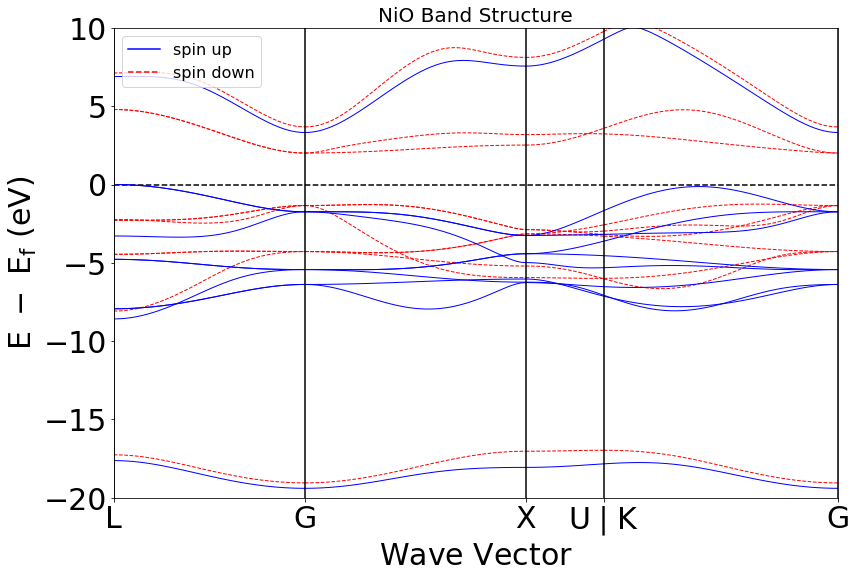

In [14]:
# get the plot
bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
print(bs.efermi)

# add some features
ax = plt.gca()
ax.set_title("NiO Band Structure", fontsize=20)
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

# add legend
ax.plot((), (), "b-", label="spin up")
ax.plot((), (), "r--", label="spin down")
ax.legend(fontsize=16, loc="upper left")

#### 3.1) Extract data from the plot

You can get data from the plot and in particular the (x, y) coordinates of each band.

In [15]:
data = bsplot.bs_plot_data()

In [16]:
data.keys()

dict_keys(['ticks', 'distances', 'energy', 'vbm', 'cbm', 'lattice', 'zero_energy', 'is_metal', 'band_gap'])

For example, here, you print the abscissa and the energy of the 9th band. Keep in mind that here the data are the ones used to do the plot. Thus the zero to fermi translation is already done according to the `BSPlotter` class.

In [17]:
ibands = 9  # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    print(20 * "-")
    for x, bands in zip(xpath, epath[spin][ibands]):
        print("%8.4f %8.4f" % (x, bands))

--------------------
  0.0000   6.8926
  0.0273   6.8929
  0.0546   6.8941
  0.0819   6.8956
  0.1092   6.8974
  0.1365   6.8990
  0.1638   6.8999
  0.1911   6.8994
  0.2184   6.8970
  0.2457   6.8919
  0.2730   6.8832
  0.3003   6.8702
  0.3276   6.8520
  0.3549   6.8278
  0.3822   6.7970
  0.4095   6.7589
  0.4368   6.7131
  0.4641   6.6591
  0.4914   6.5967
  0.5187   6.5259
  0.5460   6.4468
  0.5733   6.3595
  0.6006   6.2643
  0.6279   6.1617
  0.6552   6.0522
  0.6825   5.9364
  0.7097   5.8148
  0.7370   5.6881
  0.7643   5.5569
  0.7916   5.4220
  0.8189   5.2841
  0.8462   5.1440
  0.8735   5.0024
  0.9008   4.8600
  0.9281   4.7178
  0.9554   4.5765
  0.9827   4.4371
  1.0100   4.3006
  1.0373   4.1680
  1.0646   4.0403
  1.0919   3.9189
  1.1192   3.8049
  1.1465   3.6996
  1.1738   3.6045
  1.2011   3.5209
  1.2284   3.4503
  1.2557   3.3938
  1.2830   3.3526
  1.3103   3.3275
  1.3376   3.3191
--------------------
  1.3376   3.3191
  1.3691   3.3303
  1.4006   3.3638
  1.

Same as above but in a plot.

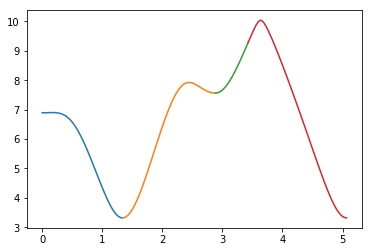

In [18]:
ibands = 9  # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    plt.plot(xpath, epath[spin][ibands])

The same again but merging the slices of the band.

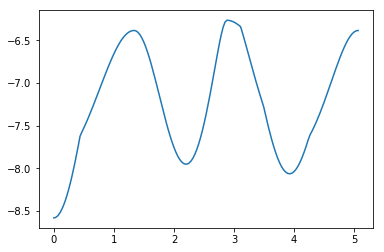

In [19]:
ibands = 1  # band number from 0 --> number of bands
spin = str(Spin.up)

x = list()
y = list()
for xpath, epath in zip(data["distances"], data["energy"]):
    x += xpath
    y += epath[spin][ibands]

plt.plot(x, y)

### 4) Plot DOS

Read the DOS from another calculations.

In [21]:
dosrun = Vasprun("../DOS_SMEAR/vasprun.xml", parse_dos=True)
dos = dosrun.complete_dos
print(dosrun.efermi)
print(dos.efermi)

5.24546925
5.24546925


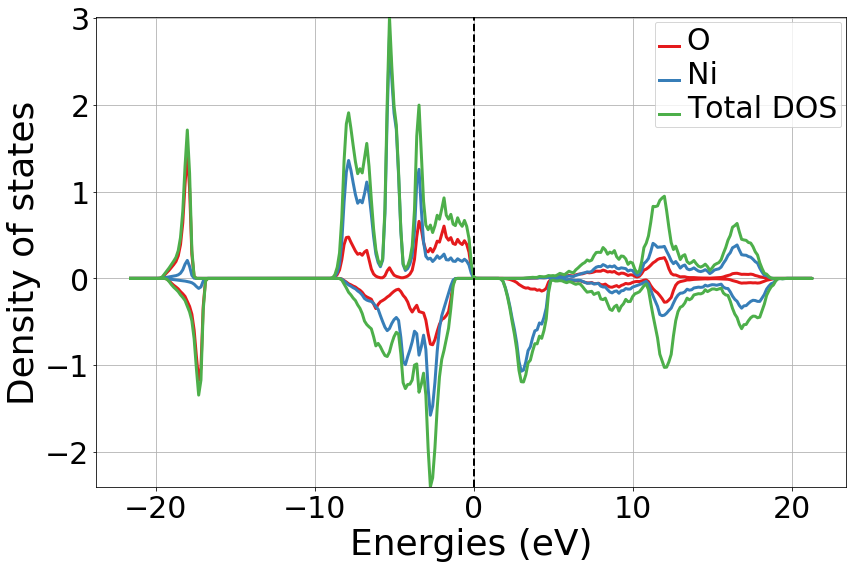

In [22]:
dosplot = DosPlotter(sigma=0.1)
dosplot.add_dos("Total DOS", dos)
dosplot.add_dos_dict(dos.get_element_dos())
plt = dosplot.get_plot()
plt.grid()

### 5) Plot Bands and DOS

In [23]:
bs = run.get_band_structure("KPOINTS", efermi=dos.efermi)

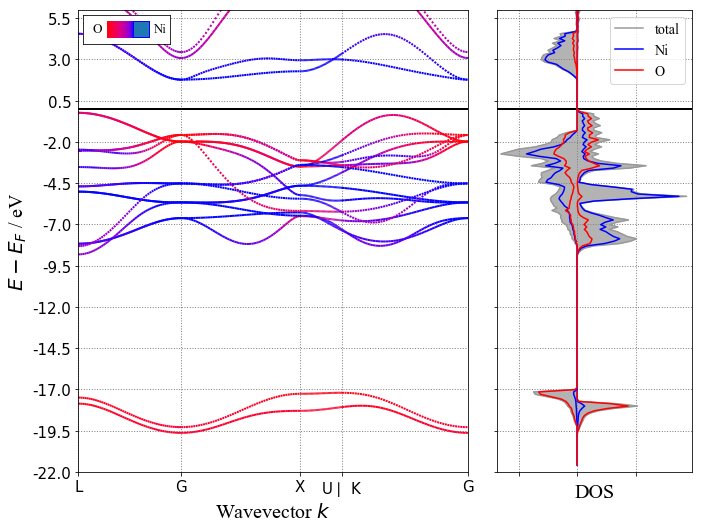

In [24]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements", 
    dos_projection="elements", 
    vb_energy_range=22,
    egrid_interval=2.5
)
plt = bsdosplot.get_plot(bs, dos=dos)

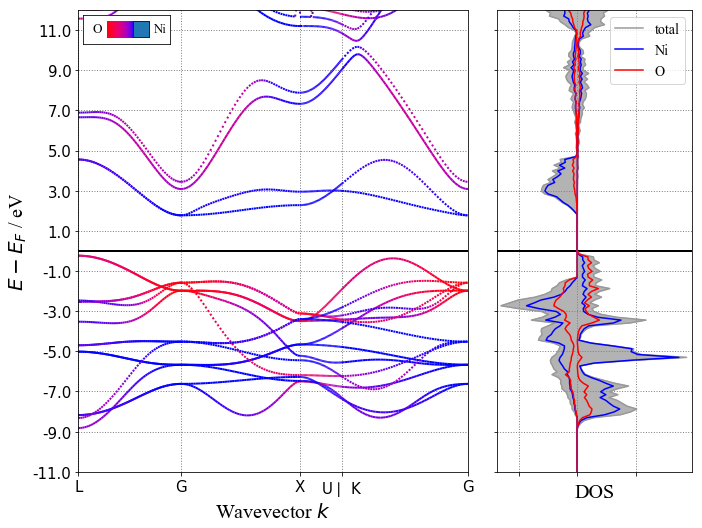

In [26]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements", 
    dos_projection="elements", 
    vb_energy_range=11,
    cb_energy_range=10,
    egrid_interval=2
)
plt = bsdosplot.get_plot(bs, dos=dos)